<a href="https://colab.research.google.com/github/psps-projects/Online-News-Popularity/blob/main/Project_Code_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting the Popularity of Online News**

**Downloading and import the needed libraries**
(This part was finalized after the completion of the whole analysis.)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

import seaborn as sns

**Downloading the data**

In [ ]:
df=pd.read_csv("Online News Popularity.csv")

In [ ]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593.0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500.0
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0


**Checking the shape of the dataframe; number of rows and columns.**

In [ ]:
df.shape

(4960, 61)

**Checking the types of data.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             4960 non-null   object 
 1    timedelta                      4959 non-null   float64
 2    n_tokens_title                 4959 non-null   float64
 3    n_tokens_content               4959 non-null   float64
 4    n_unique_tokens                4959 non-null   float64
 5    n_non_stop_words               4959 non-null   float64
 6    n_non_stop_unique_tokens       4959 non-null   float64
 7    num_hrefs                      4959 non-null   float64
 8    num_self_hrefs                 4959 non-null   float64
 9    num_imgs                       4959 non-null   float64
 10   num_videos                     4959 non-null   float64
 11   average_token_length           4959 non-null   float64
 12   num_keywords                   49

**A statistical summary of the numerical attributes.**

In [ ]:
df.describe() 

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,...,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000
mean,687.998790,9.794918,477.396854,0.562831,0.991934,0.705780,9.509780,3.192176,3.678968,1.384150,...,0.099265,0.767317,-0.254106,-0.483139,-0.114703,0.279807,0.090470,0.346239,0.160537,3322.247227
std,25.528571,1.954527,394.187622,0.119345,0.089458,0.122490,9.699512,4.613585,6.991739,5.203274,...,0.072732,0.227044,0.126893,0.274567,0.101732,0.326140,0.269372,0.186967,0.234457,11661.731473
min,643.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,4.000000
25%,666.000000,8.000000,221.000000,0.488027,1.000000,0.643541,4.000000,1.000000,0.000000,0.000000,...,0.050000,0.600000,-0.322222,-0.666667,-0.125000,0.000000,0.000000,0.166667,0.000000,1000.000000
50%,688.000000,10.000000,349.000000,0.562753,1.000000,0.711340,6.000000,2.000000,1.000000,0.000000,...,0.100000,0.800000,-0.246875,-0.500000,-0.100000,0.100000,0.000000,0.500000,0.000000,1600.000000
75%,710.000000,11.000000,616.000000,0.635359,1.000000,0.780071,12.000000,4.000000,1.000000,1.000000,...,0.100000,1.000000,-0.177698,-0.291667,-0.050000,0.500000,0.196591,0.500000,0.250000,2900.000000
max,731.000000,18.000000,4125.000000,1.000000,1.000000,1.000000,171.000000,63.000000,99.000000,75.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,617900.000000


**Data in Histograms**

Let's take a look at the data in histograms.There was quite a lot of categorical variables in the data, represented here by the single high bars in many of the charts.

<function matplotlib.pyplot.show(*args, **kw)>

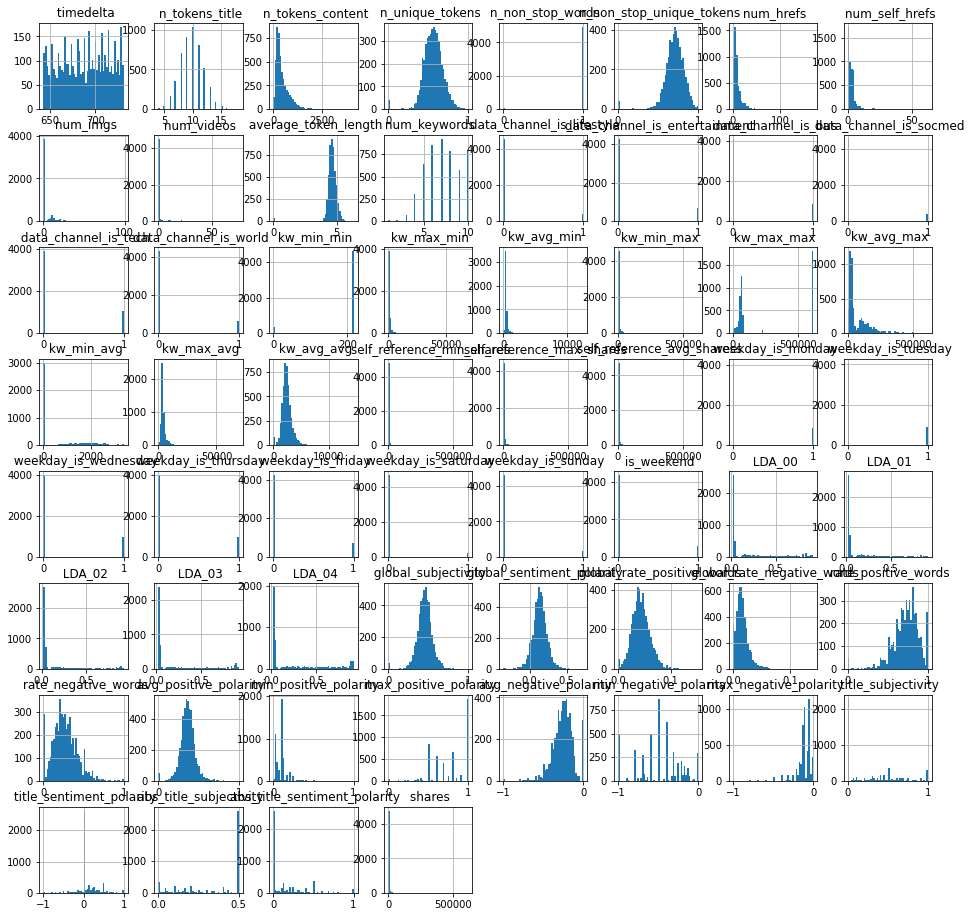

In [ ]:
df.hist(bins=50, figsize= (16,16))
plt.show

**Linear Regression**

**2. Fixing outliers
Spotting and removing outliers**

Plotting the 'shares' label in a histogram makes it clear that outliers are present! Anything beyond c.3000 shares is not even visible! Let's remove them before moving further

In [ ]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

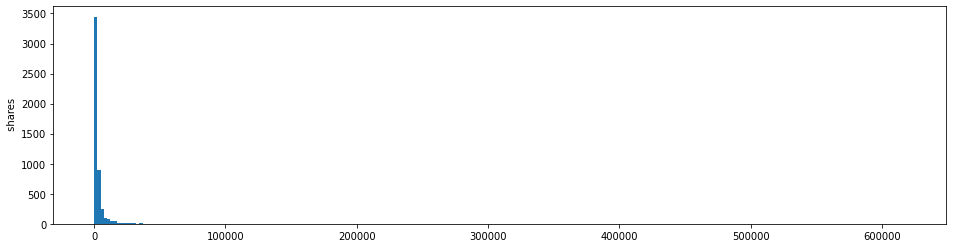

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 4.0
#plt.rcParams["figure.figsize"] = fig_size

x = df[' shares']
plt.hist(x, bins=250)
plt.ylabel(' shares');

**We remove the outliers using a function, which leaves out the 'shares' where the value is larger than its mean +/- two standard deviations.**

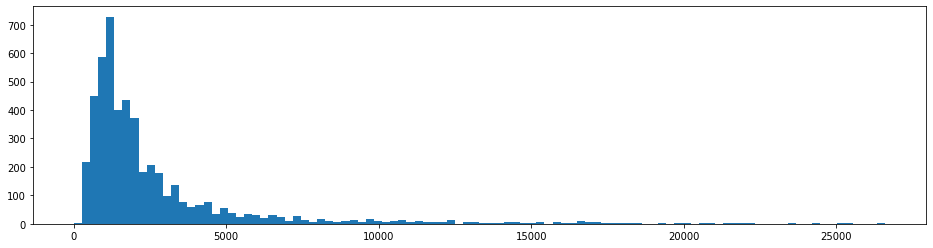

(4906, 1)

In [ ]:
def reject_outliers(shares):
    u = np.mean(df[' shares'])
    s = np.std(df[' shares'])
    filtered= [e for e in (df[' shares']) if (u - 2 * s < e < u + 2 * s)]
    return filtered
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 4.0
#plt.rcParams["figure.figsize"] = fig_size
filtered = reject_outliers('shares')
plt.hist(filtered, 100)
fig_size[0]=16.0
fig_size[1]=8.0
plt.show()
df_shares = pd.DataFrame(filtered)
df_shares.shape

The number of rows in the original dataframe was 39644. Using the function above we spotted and removed 591 outliers altogether, c. 1.5% of the rows.

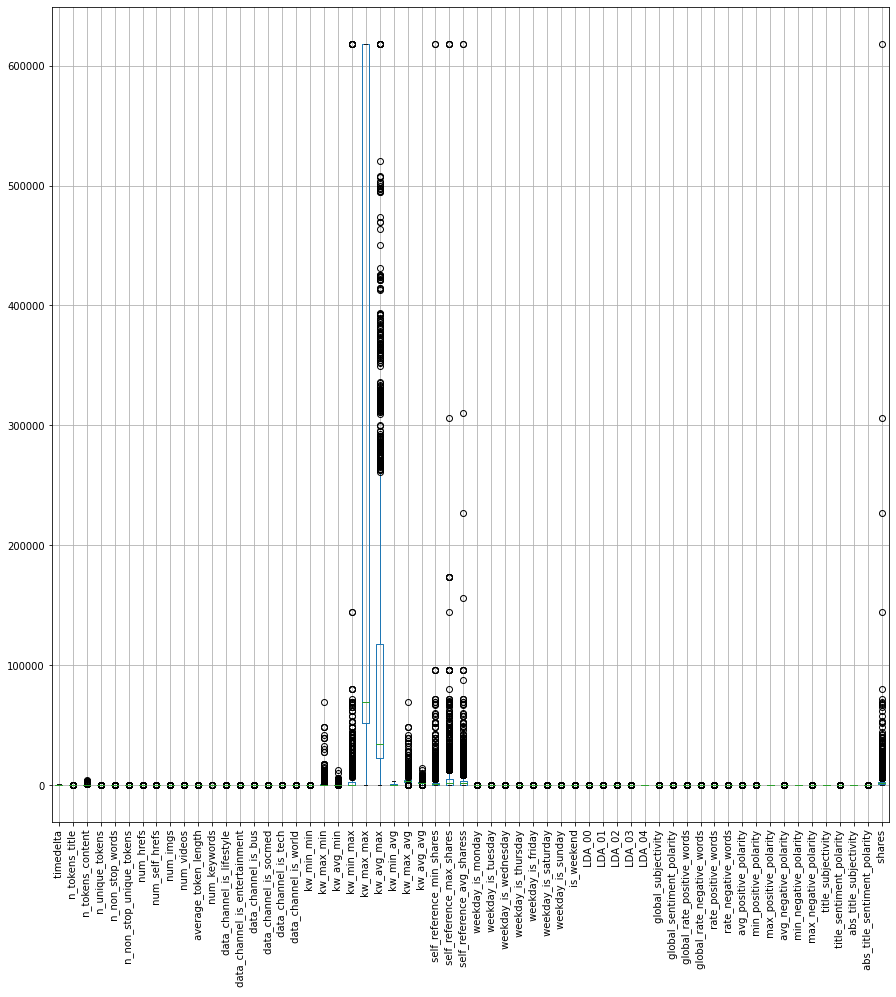

In [ ]:
plt.figure(figsize=(15,15))
df.boxplot()
plt.xticks(rotation =90)
plt.show()

**Creating a new data set without outliers**

Let's create a new dataframe - df2 - where outliers are rejected. We define an outlier as a value of 'shares' which is outside two standard deviations (= 3395 + (2 x 11627) = 26649) of the median for 'shares (3395.38). For this we use Pandas' Conditional Selection.
We obviously consider only the upper bound, which is a positive number. The mean minus two standard deviations would result in a negative number, and it's not possible to have a negative number of 'shares'.

Checking the shape of the new dataframe; number of rows and columns.

In [ ]:
df2 = df[df[' shares']<26647]
df2.shape

(4906, 61)

The new dataframe df2 has c. 500 rows less than the original with the highest value for 'shares' being c. 26650.
There is a slight difference in how many outliers the function def reject_outliers(shares) above removes (=591) and how many are removed by the Conditional Selection (=514). This is probably due to rounding errors in the calculation of the mean and standard deviation, since 'shares' above 1000 are rounded to the nearest hundred.

**3. Correlations in data - numerically and graphically**

Next a look at the variables' correlations, numerically and graphically.

In [ ]:
corrmat = df2.corr()
corrmat[' shares'].sort_values(ascending=False)

 shares                           1.000000
 kw_avg_avg                       0.124586
 weekday_is_saturday              0.111974
 is_weekend                       0.106908
 kw_max_max                       0.090087
 kw_avg_max                       0.080713
 data_channel_is_socmed           0.080114
 kw_max_avg                       0.077507
 self_reference_avg_sharess       0.060588
 self_reference_max_shares        0.056612
 kw_min_avg                       0.054352
 global_subjectivity              0.049943
 self_reference_min_shares        0.048687
 data_channel_is_tech             0.045910
 weekday_is_sunday                0.040593
 LDA_03                           0.040094
 title_sentiment_polarity         0.035539
 title_subjectivity               0.032471
 num_videos                       0.032369
 abs_title_sentiment_polarity     0.030555
 kw_max_min                       0.023782
 num_hrefs                        0.023355
 weekday_is_friday                0.023006
 num_keywor

Correlations between the variables and the label 'shares' are throughout rather low. This is presented also by the very light colours throughout the matrix below.

**Correlation matrix**

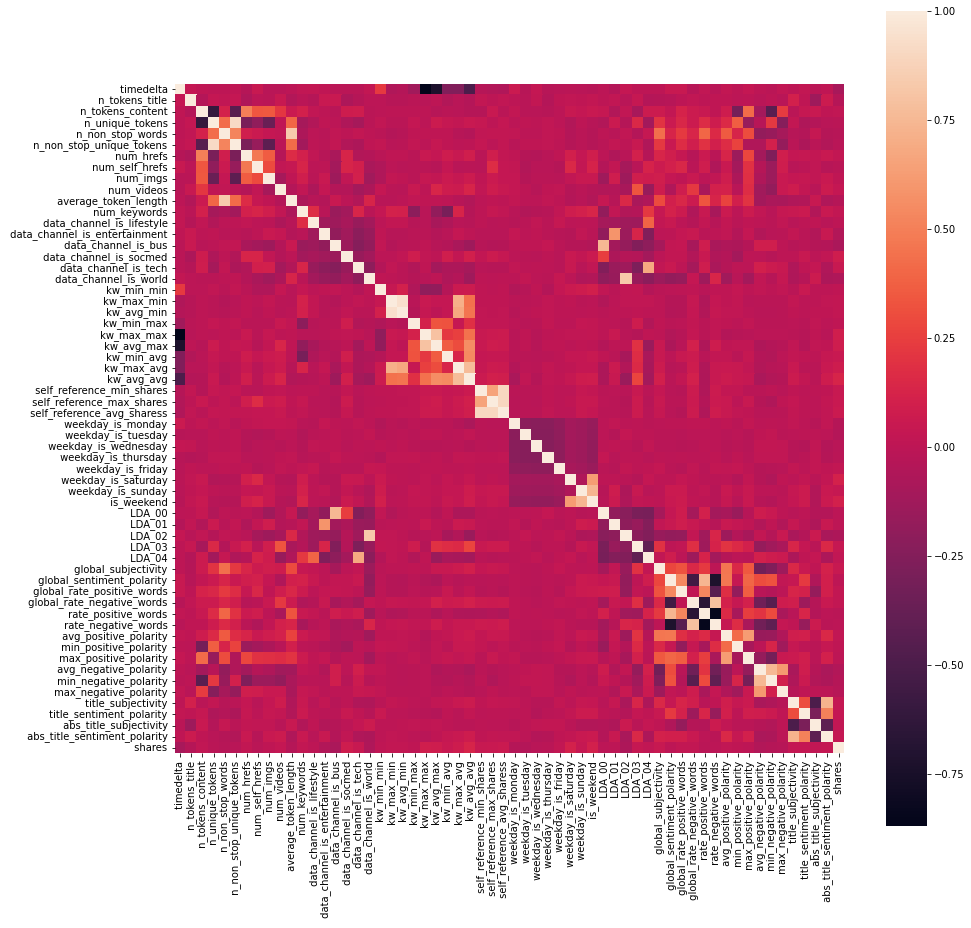

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=1, square=True);
plt.show()

the Top 15 of most correlated features' and their types:

kw_avg_avg - NUMERICAL
LDA_03 - NUMERICAL
kw_max_avg - NUMERICAL
kw_min_avg - NUMERICAL
num_hrefs - NUMERICAL
num_imgs - NUMERICAL
self_reference_avg_sharess - NUMERICAL
is_weekend - CATEGORICAL
self_reference_min_shares - NUMERICAL
self_reference_max_shares - NUMERICAL
kw_avg_max - NUMERICAL
global_subjectivity - NUMERICAL
abs_title_sentiment_polarity - CATEGORICAL
weekday_is_sunday - CATEGORICAL
title_subjectivity - CATEGORICAL

Let's view them in scatter matrices, in three separate ones for clarity's sake.

**Scatter matrices - 15 most correlated features**

In [ ]:
df2.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

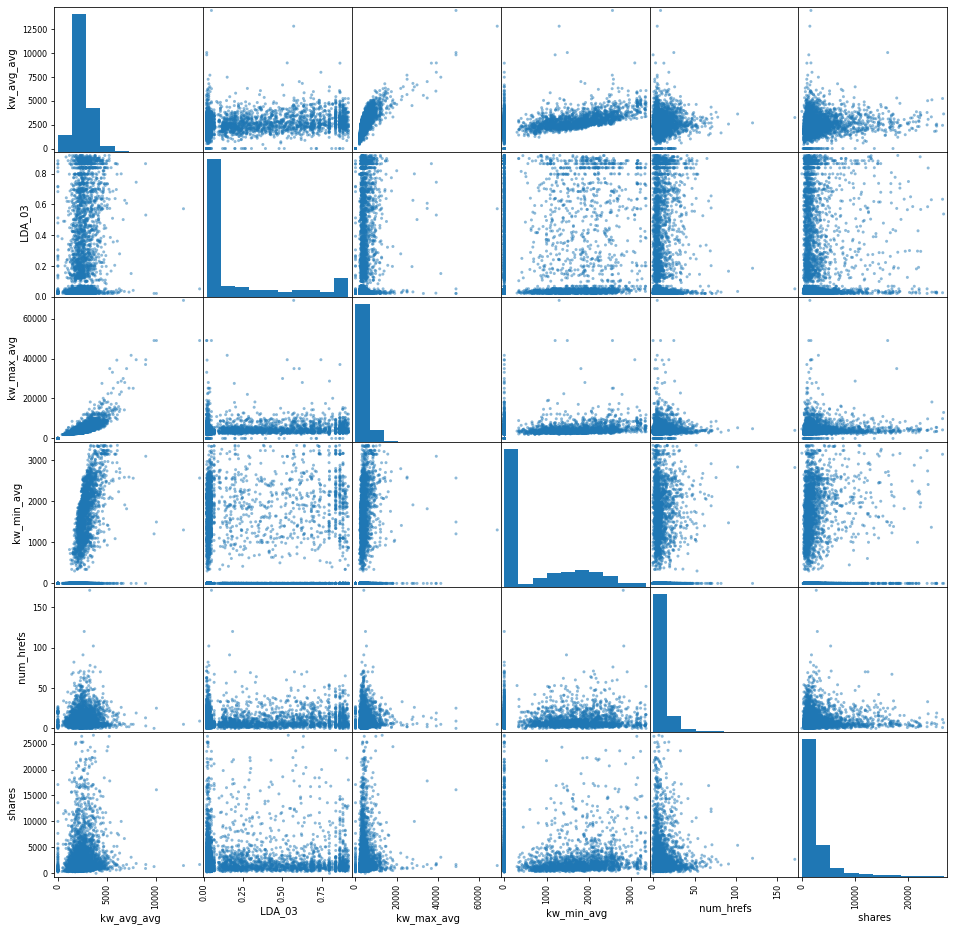

In [ ]:
attributes = [' kw_avg_avg',' LDA_03',' kw_max_avg',' kw_min_avg',' num_hrefs',' shares']
scatter_matrix(df2[attributes], figsize=(16, 16));

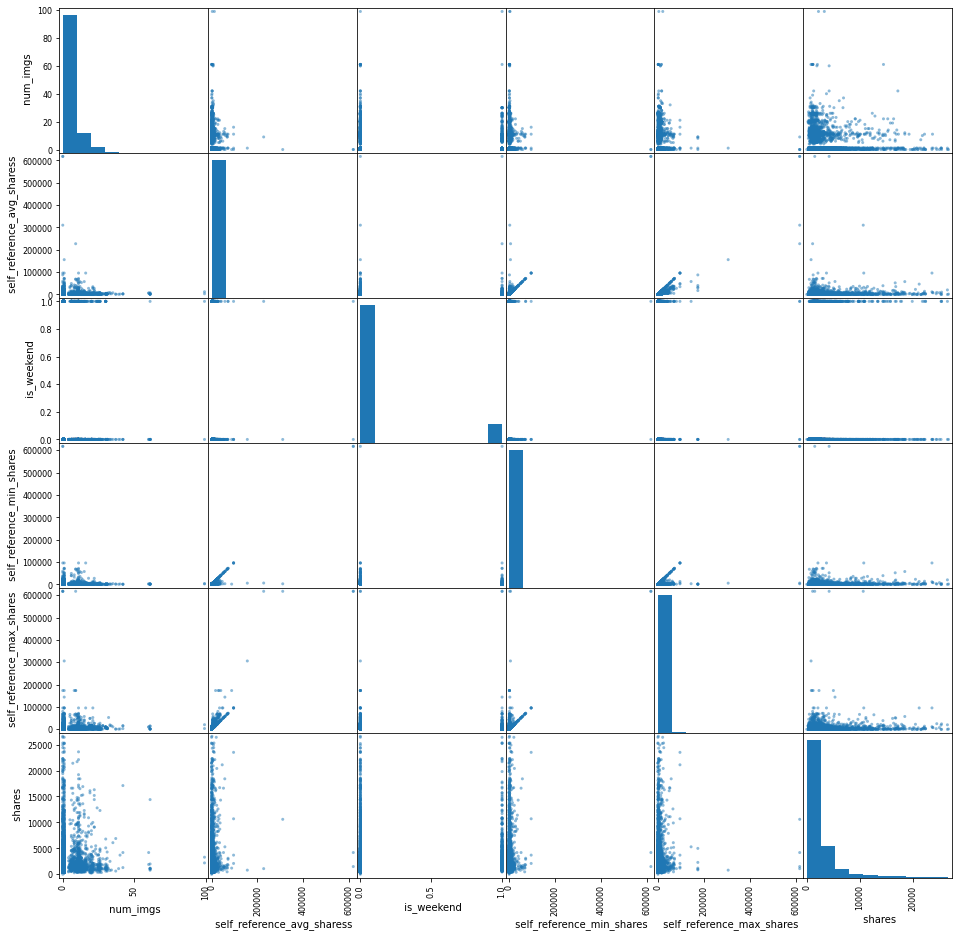

In [ ]:
attributes = [' num_imgs',' self_reference_avg_sharess',' is_weekend',' self_reference_min_shares',' self_reference_max_shares',' shares']
scatter_matrix(df2[attributes], figsize=(16, 16));

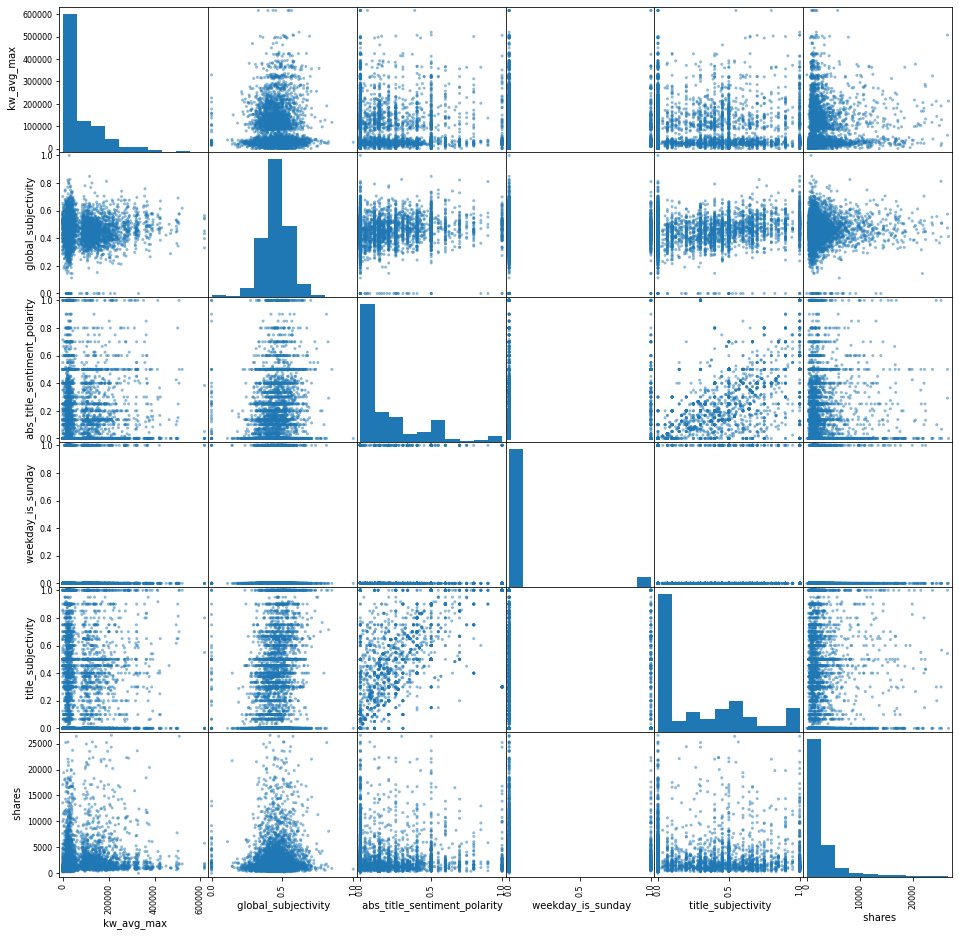

In [ ]:
attributes = [' kw_avg_max',' global_subjectivity',' abs_title_sentiment_polarity',' weekday_is_sunday',' title_subjectivity',' shares']
scatter_matrix(df2[attributes], figsize=(16,16));

**4. Sampling?**
We have now looked at the data both numerically in a correlation matrix and visually in scatter matrices. It's apparent that no single attribute is clearly more important than the others. The attribute 'kw_avg_avg' has the highest correlation with 'shares', and it's still only barely 0.18. This would mean stratified sampling is not really needed. In Stratified Sampling we would divide the data into homogenous subgroups called strata then a number of instances would be sampled from each stratum to guarantee that the test set is representative of the overall data. Without any single attribute standing out as significant even with purely random sampling the risk for a skewed test set is insiginificant, hence, no need for stratified sampling.

**5. Train Test split**
Now we need to split our data to a train set (80%) and test set (20%). The variable we're trying to predict is 'shares; what determines the probability that a reader will share an online news article.
The random_state of the split is set to a fixed number, here the commonly used '42', thereby keeping the random number generator constant. This way we avoid the risk of introducing sampling bias by always getting the same split.

In [ ]:
train_set, test_set = train_test_split(df2, test_size=0.20, random_state=42)

# remove 'shares' - the predicted variable and 'url' - a text variable
X_train_set = train_set.drop(['url',' shares'], axis=1) 
y_train_set = train_set[' shares']

X_test_set = test_set.drop(['url',' shares'], axis=1)
y_test_set = test_set[' shares']

We now have a 80% Train set with 31304 rows and 20% Test set with 7826 rows!!!
Let's introduce the Linear Regression model and try it out with a few instances from the training set.

**6. Linear Regression**

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_set, y_train_set)

LinearRegression()

In [ ]:
some_X_data = X_train_set.iloc[:500]
some_y_data = y_train_set.iloc[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(lin_reg.predict(some_X_data),list(some_y_data) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_someXdata_LR.head()

,Actual shares,Predicted shares
0,3300.0,3245.809029
1,1100.0,1532.865540
2,6400.0,2693.330154
3,5000.0,2649.133881
4,1400.0,3620.301048


We now have a working Linear Regression model which we can test using a sample, here 500, from the Training set. The first 5 rows in the dataframe do not look too encouraging prediction wise. But the scatter plot below does present a slight pattern. Let's also measure the model's RMSE and MAE on the whole Training set.

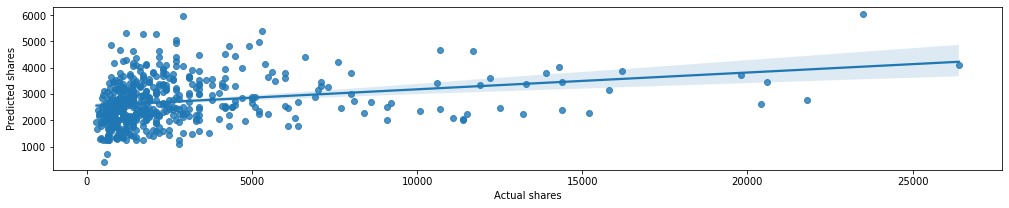

In [ ]:
f, ax = plt.subplots(figsize=(17, 3))
sns.regplot(x=df_someXdata_LR["Actual shares"], y=df_someXdata_LR["Predicted shares"])
# sns.plt.show()

**Linear Regression - RMSE and MAE for the Training set**

In [ ]:
share_predictions = lin_reg.predict(X_train_set)
lin_mse = mean_squared_error(y_train_set, share_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse #with outliers: 11648.966

3136.1775855490664

In [ ]:
df[' shares'].median() #with outliers: 1400

1600.0

The median is 1400. The model with its RMSE around 3300 is clearly underfitting the training data. This can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough.
The main ways to fix the model in this case are to

select a more powerful model

feed the training algorithm with better features

Let's check also the Mean Absolute Error - MAE

In [ ]:
lin_mae = mean_absolute_error(y_train_set, share_predictions)
print(lin_mae) 

1859.5076676931585


In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

**Cross Validation - Linear Regression**
Let's compute the same scores for the Linear Regression model as well, just to be sure:

In [ ]:
lin_scores = cross_val_score(lin_reg, X_train_set, y_train_set,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores) #with outliers:mean 13185 std 7605

Scores: [3381.38532662 3440.44350514 3188.39289925 2727.35622882 3740.58462074
 2551.33408874 3513.76795933 2894.6064986  3214.8074772  3152.23976818]
Mean: 3180.4918372614366
Standard deviation: 348.9484076042995


After Cross Validation also Linear Regression looks worse.

**MSE, MAPE**

In [ ]:
from sklearn.utils import check_array
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = check_array(y_true, y_pred)

    
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mse = mean_squared_error(y_train_set, share_predictions)
print(mse)

9835609.848100372


**10. Summarizing RMSE, MAE, MAPE, MPE and MSE - pre-Cross Validation**
The results are

Linear regression
RMSE : 3272 , MAE : 835

**11. Hyperparameters and Feature Importance**

Finding the optimal number of hyperparameters through Grid Search

We can use Grid Search instead of fiddling with hyperparameters manually

In [ ]:
param_grid = [
     {'n_estimators': [3,10], 'max_features':[2,3,4]},
    {'bootstrap': [False], 'n_estimators': [3,10],'max_features': [2,3,4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring="neg_mean_squared_error")

grid_search.fit(X_train_set, y_train_set)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 3, 4], 'n_estimators': [3, 10]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [ ]:
cvres=grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

3724.7550031223122 {'max_features': 2, 'n_estimators': 3}
3344.3618371272596 {'max_features': 2, 'n_estimators': 10}
3629.4142339192426 {'max_features': 3, 'n_estimators': 3}
3315.503048467108 {'max_features': 3, 'n_estimators': 10}
3673.1126908385045 {'max_features': 4, 'n_estimators': 3}
3360.5232040528317 {'max_features': 4, 'n_estimators': 10}
3600.7314389261837 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3299.2908280373154 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3686.3742855073874 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3347.551344231838 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
3680.1079662080947 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
3338.2133011906712 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [ ]:
print(grid_search.best_params_)

{'bootstrap': False, 'max_features': 2, 'n_estimators': 10}


Through Grid Search we would get the optimal model with

max_features = 2, which here determines the maximum number of features to consider while looking for a split at a leaf
n_estimators = 10, which here is the number of trees to be used in the forest

Through Grid Search we would get the optimal model with

max_features = 2, which here determines the maximum number of features to consider while looking for a split at a leaf
n_estimators = 10, which here is the number of trees to be used in the forest



In [ ]:
param_distribs = {
        'n_estimators': randint(low=1, high=20),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train_set, y_train_set)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faf3d924cd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faf3cf23cd0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3291.008720219263 {'max_features': 7, 'n_estimators': 15}
3398.828025791713 {'max_features': 3, 'n_estimators': 8}
3407.8693074179 {'max_features': 5, 'n_estimators': 7}
3248.0968820167614 {'max_features': 2, 'n_estimators': 19}
3318.145532482847 {'max_features': 7, 'n_estimators': 11}
3560.4180441462004 {'max_features': 3, 'n_estimators': 4}
3835.352985614078 {'max_features': 3, 'n_estimators': 2}
3417.7443593672633 {'max_features': 4, 'n_estimators': 6}
4612.219858655121 {'max_features': 2, 'n_estimators': 1}
3309.9546450702423 {'max_features': 4, 'n_estimators': 12}


We seem to obtain the best solution - i.e. with lowest RMSE - by setting max_features hyperparameter to 2 and the n_estimators hyperparameter to 19; RMSE:3340.35

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([2.00327437e-02, 1.75778879e-02, 2.26789198e-02, 2.86965887e-02,
       6.21961652e-05, 2.57687385e-02, 1.84606400e-02, 1.79616425e-02,
       1.15239903e-02, 1.05170671e-02, 2.79683759e-02, 1.49135785e-02,
       3.17957831e-03, 3.55572715e-03, 3.54552656e-03, 4.53023609e-03,
       3.90886166e-03, 2.53121314e-03, 2.12036480e-03, 2.60013786e-02,
       3.08258044e-02, 1.30822078e-02, 1.12911975e-02, 2.57165177e-02,
       1.47733894e-02, 2.64006973e-02, 2.94546622e-02, 2.47739481e-02,
       1.85347815e-02, 2.91931609e-02, 2.44414202e-03, 4.78486683e-03,
       5.06263932e-03, 5.34645066e-03, 4.90649500e-03, 4.07100557e-03,
       2.03482254e-03, 4.72012257e-03, 2.62516307e-02, 2.66896584e-02,
       2.46035567e-02, 2.97007657e-02, 2.65920053e-02, 2.61258059e-02,
       2.38042467e-02, 2.65825157e-02, 2.84762381e-02, 2.00517777e-02,
       2.62167837e-02, 2.73979931e-02, 1.45708862e-02, 1.65364571e-02,
       2.61077234e-02, 1.44550497e-02, 2.28745644e-02, 2.18363994e-02,
      

Since Feature Importances are normalized they sum to one and describe how much a single feature contributes to the forest's total impurity reduction. To be noted is that if some features in the data are correlated they will get a lower importance than an equally important uncorrelated feature. Therefore, before just starting to remove features with low importance one should check for possible high correlations first.

**Feature Importances - numerically and graphically**

Let's view the Feature Importance scores next to their corresponding attribute names:

In [ ]:
attributes_all = ['kw_avg_avg','LDA_03','kw_max_avg','kw_min_avg','num_hrefs','num_imgs','self_reference_avg_sharess','is_weekend','self_reference_min_shares','self_reference_max_shares','kw_avg_max','global_subjectivity','abs_title_sentiment_polarity','weekday_is_sunday','title_subjectivity','data_channel_is_socmed','num_keywords','weekday_is_saturday','title_sentiment_polarity','num_videos','kw_avg_min','kw_max_min','data_channel_is_lifestyle','avg_positive_polarity','timedelta','global_sentiment_polarity','max_positive_polarity','data_channel_is_tech','global_rate_positive_words','kw_min_max','num_self_hrefs','LDA_04','kw_min_min','kw_max_max','global_rate_negative_words','n_tokens_content','n_unique_tokens','n_non_stop_words','n_non_stop_unique_tokens','min_positive_polarity','abs_title_subjectivity','weekday_is_friday','weekday_is_monday','LDA_00','max_negative_polarity','n_tokens_title','weekday_is_thursday','rate_positive_words','weekday_is_tuesday','min_negative_polarity','weekday_is_wednesday','LDA_01','rate_negative_words','avg_negative_polarity','data_channel_is_entertainment','data_channel_is_bus','average_token_length','data_channel_is_world','LDA_02']


In [ ]:
sorted(zip(feature_importances, attributes_all), reverse=True)

[(0.030825804372523153, 'kw_avg_min'),
 (0.029700765657722766, 'weekday_is_friday'),
 (0.029454662189453418, 'max_positive_polarity'),
 (0.029193160885866175, 'kw_min_max'),
 (0.02869658874422846, 'kw_min_avg'),
 (0.028476238072536113, 'weekday_is_thursday'),
 (0.027968375944181677, 'kw_avg_max'),
 (0.027397993064765765, 'min_negative_polarity'),
 (0.026689658360651364, 'min_positive_polarity'),
 (0.026592005278261294, 'weekday_is_monday'),
 (0.026582515748414758, 'n_tokens_title'),
 (0.026400697338421115, 'global_sentiment_polarity'),
 (0.02625163071607891, 'n_non_stop_unique_tokens'),
 (0.026216783748440185, 'weekday_is_tuesday'),
 (0.02612580588349412, 'LDA_00'),
 (0.026107723392136233, 'rate_negative_words'),
 (0.02600137863882889, 'num_videos'),
 (0.025768738523748235, 'num_imgs'),
 (0.025716517690844452, 'avg_positive_polarity'),
 (0.024773948107942374, 'data_channel_is_tech'),
 (0.02460355671843877, 'abs_title_subjectivity'),
 (0.023804246695212528, 'max_negative_polarity'),
 (0

In [ ]:
df_nn = pd.DataFrame(feature_importances, attributes_all)
df_nn.reset_index(level=0, inplace=True)
df_nn.sort_values(0).rename(index=str, columns={"index": "Feature", 0: "importance"})

,Feature,importance
4,num_hrefs,0.000062
36,n_unique_tokens,0.002035
18,title_sentiment_polarity,0.002120
30,num_self_hrefs,0.002444
17,weekday_is_saturday,0.002531
12,abs_title_sentiment_polarity,0.003180
14,title_subjectivity,0.003546
13,weekday_is_sunday,0.003556
16,num_keywords,0.003909
35,n_tokens_content,0.004071


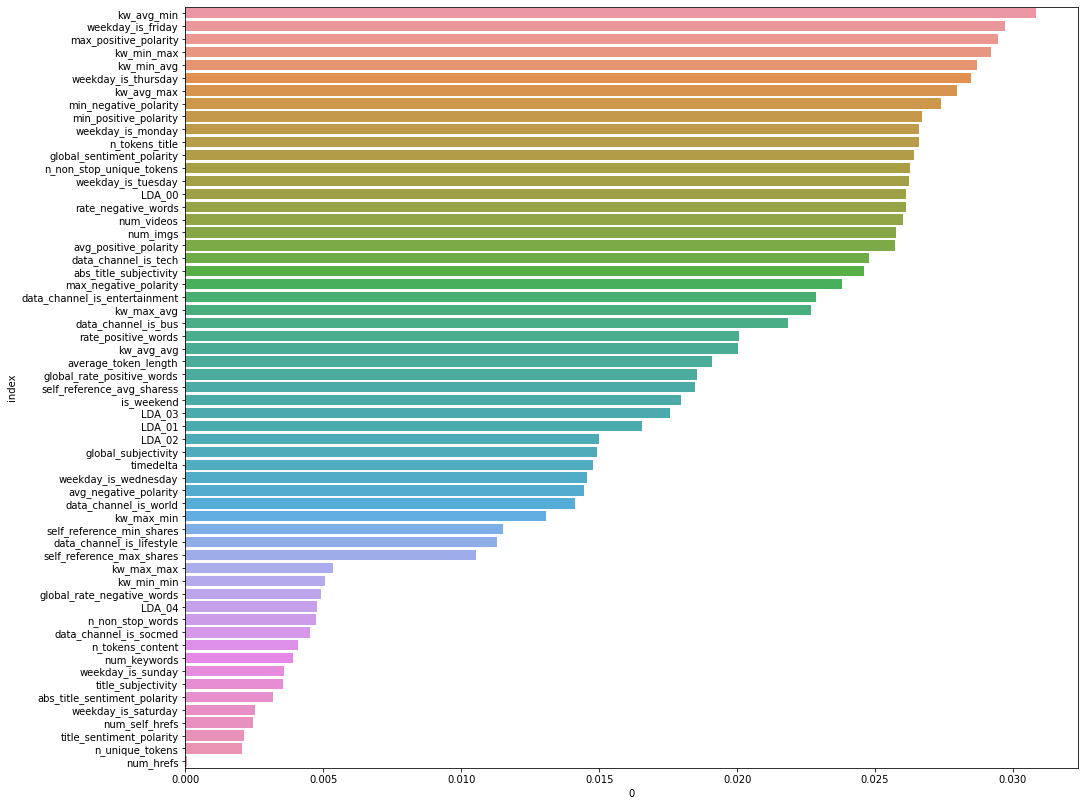

In [ ]:
f, ax = plt.subplots(figsize=(16, 14))
sns.set_color_codes("pastel")
ax = sns.barplot( y='index', x= 0, data=df_nn.sort_values([0], ascending=[False]))

**12. Evaluating the Final Model with the Test Set**

Finally, using the test set we've kept aside, let's check how good the model is.

In [ ]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test_set)

final_mse = mean_squared_error(y_test_set, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

3445.108637273592

Next, testing the model with actual data

In [ ]:
some_X_data = X_test_set.iloc[:] #seems to be working also w-o .iloc!
some_y_data = y_test_set.iloc[:] #seems to be working also w-o .iloc!

Predicted_shares = list(final_model.predict(some_X_data)) 

Actual_shares = list(some_y_data)

final_data = [Predicted_shares, Actual_shares]

The 'final_data' consist now of the Predicted values for 'shares' the model creates, and the Actual values for 'shares' from our test set we've kept aside for this. In order to view it graphically, we create the needed dataframes. But first, we sort the data.

In [ ]:
sorted(zip(Predicted_shares, Actual_shares), reverse=True);

And then look at the values side by side.

In [ ]:
df_shares = pd.DataFrame(Predicted_shares, Actual_shares)   
df_shares.reset_index(level=0, inplace=True)
df_shares_AvsP = df_shares.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_shares_AvsP.head()

,Actual shares,Predicted shares
0,1300.0,3890.0
1,2100.0,6308.3
2,2100.0,2762.3
3,1600.0,5154.5
4,10700.0,2414.6


This is what the result looks like plotting the Predicted shares against Actual shares:

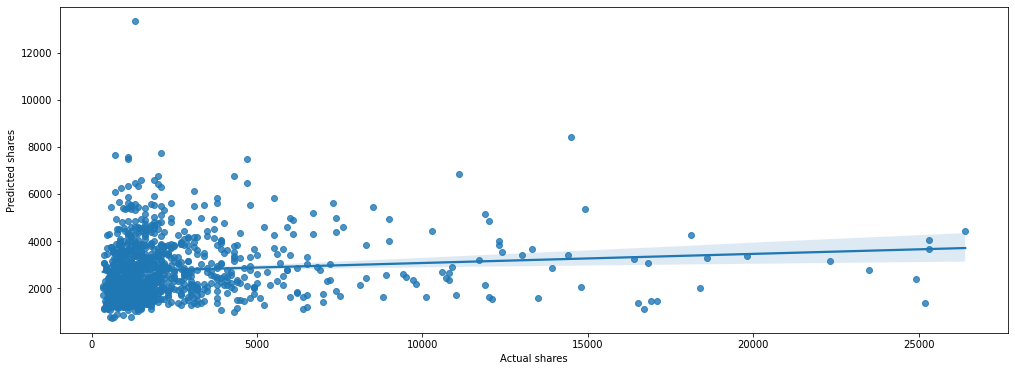

In [ ]:
f, ax = plt.subplots(figsize=(17, 6))
sns.regplot(x=df_shares_AvsP["Actual shares"], y=df_shares_AvsP["Predicted shares"])

The results don't look too encouraging! There is a lot of dispersion. Plotting them in a histogram gives a different perspective, but still shows Predictions from the model tend to be more evenly distributed, with a lower kurtosis.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


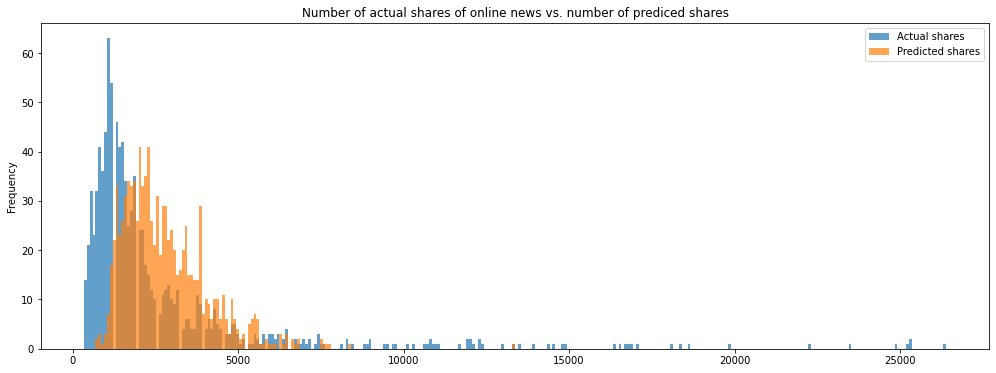

In [ ]:
fig_size[0]=17.0
fig_size[1]=6.0
df_shares_AvsP.plot(bins=300, kind='hist', alpha=0.7)
plt.title('Number of actual shares of online news vs. number of prediced shares')
axes=plt.axes()
plt.show()

The outcome is further confirmed by the very low R2 score:

In [ ]:
from sklearn.metrics import r2_score

r2_score( Actual_shares, Predicted_shares)

-0.07145263361773857

The model's prediction power is basically zero!

**13. Conclusions**
Clearly, there is a room for improvement here.

There could be to simplify the model by reducing the number of features (i.e: 20-30 by removing less important ones).

Another one would be getting rid of outliers even further. Now outliers were defined as the number of 'shares' with +/- 2 standard deviations around its mean. In practice observations where number of 'shares' was above 26647 were left out, which counted for only 1.5% of the data.
